In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Advertising = pd.read_csv("D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab5 - Linear Regression/Advertising.csv")
Advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
Advertising.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
Advertising.shape

(200, 4)

In [5]:
Advertising.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
Advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        Advertising[feature],
        Advertising[target],
        c='blue'
    )
    plt.xlabel("Money spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()

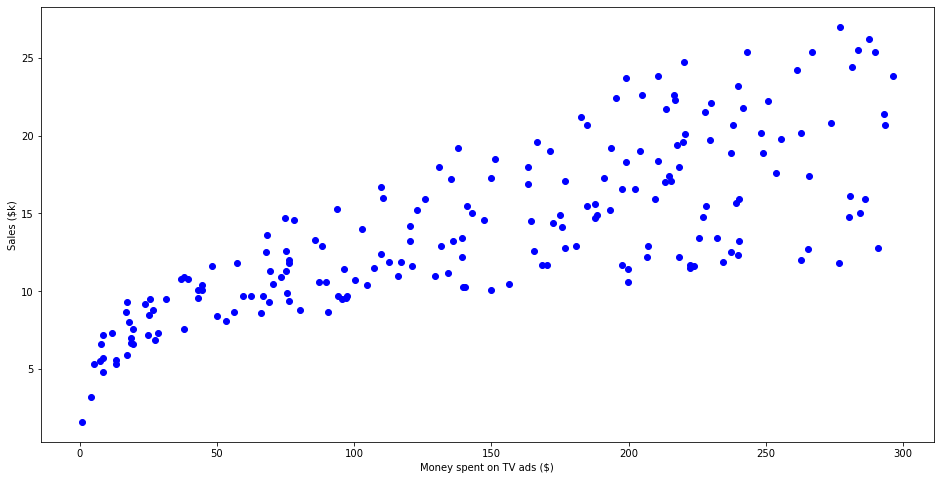

In [8]:
scatter_plot('TV', 'sales')

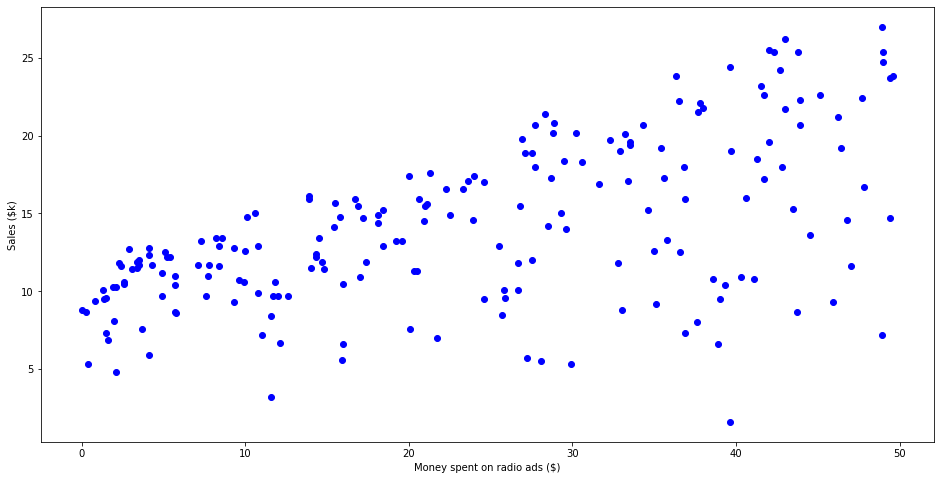

In [9]:
scatter_plot('radio', 'sales')

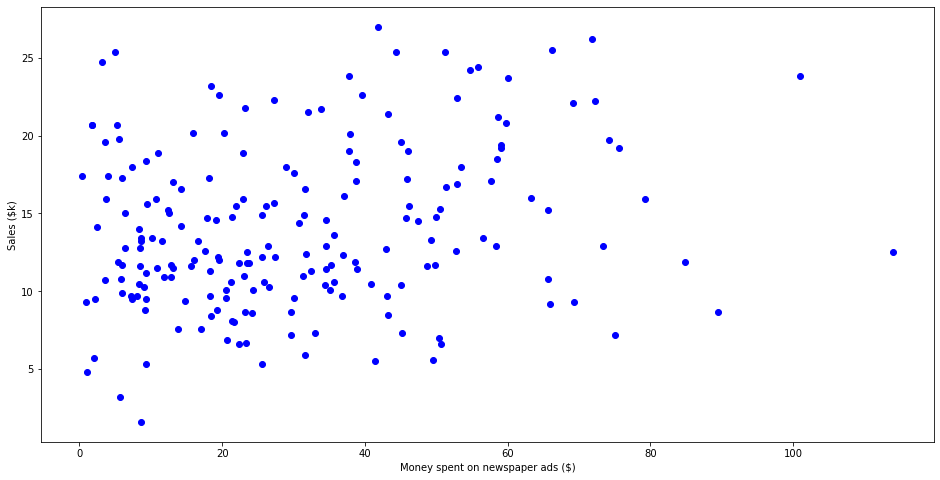

In [10]:
scatter_plot('newspaper', 'sales')

# Modelling

### Multiple Linear Regression - Ordinary Least Squares fitting

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

X = Advertising.drop(['sales'], axis=1)
y = Advertising['sales'].values.reshape(-1,1)

lin_reg = LinearRegression()
fit = lin_reg.fit(X, y)
print(fit)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

LinearRegression()
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        22:28:01   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312 

In [12]:
print("Intercept: ", lin_reg.intercept_)
print("Coefficient: ", lin_reg.coef_)

Intercept:  [2.93888937]
Coefficient:  [[ 0.04576465  0.18853002 -0.00103749]]


In [13]:
# Predictions
y_pred = lin_reg.predict(X)
print("~~~~Pedicted Sales Values~~~~")
print(y_pred)

~~~~Pedicted Sales Values~~~~
[[20.52397441]
 [12.33785482]
 [12.30767078]
 [17.59782951]
 [13.18867186]
 [12.47834763]
 [11.72975995]
 [12.12295317]
 [ 3.72734086]
 [12.55084872]
 [ 7.0322992 ]
 [17.28512918]
 [10.57712073]
 [ 8.82630048]
 [18.43436638]
 [20.81929952]
 [12.82365674]
 [23.22495716]
 [ 9.95168206]
 [14.16607293]
 [18.10076728]
 [14.7405382 ]
 [ 6.4891503 ]
 [16.5459329 ]
 [ 8.14651887]
 [15.6100386 ]
 [14.98951429]
 [17.05167344]
 [19.41053803]
 [ 9.14402389]
 [21.6339338 ]
 [11.3460929 ]
 [ 7.63888314]
 [18.86426829]
 [ 7.57483051]
 [17.00682618]
 [23.40590052]
 [15.62347779]
 [ 9.90868103]
 [20.44761039]
 [16.37766467]
 [17.2959832 ]
 [21.59580326]
 [13.96385684]
 [ 8.88787996]
 [15.16152314]
 [ 8.87338673]
 [21.7226299 ]
 [16.26362018]
 [ 8.1681656 ]
 [12.63121132]
 [ 9.33981296]
 [20.66297563]
 [19.94469957]
 [20.37443008]
 [21.2926106 ]
 [ 8.52771254]
 [12.77458802]
 [21.89805198]
 [18.13348698]
 [ 5.74215558]
 [22.89067208]
 [16.78426073]
 [13.21069202]
 [16.97773

**Coefficient of Determination**

In [14]:
print("R Square value:", r2_score(y, y_pred))

R Square value: 0.8972106381789522


In [15]:
R2s = cross_val_score(lin_reg, X, y, cv=5, scoring='r2')
print(R2s)
print("Average R Square after CV: ", np.mean(R2s))

[0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
Average R Square after CV:  0.8871063495438436


**Mean Squared Error**

In [16]:
print("Mean Squared Error: ", mean_squared_error(y_pred, y))

Mean Squared Error:  2.784126314510936


In [17]:
MSEs = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_mean_squared_error')
print(MSEs)
print("Average MSE after CV: ", np.mean(MSEs))

[-3.1365399  -2.42566776 -1.58522508 -5.42615506 -2.79114519]
Average MSE after CV:  -3.07294659710021


### Ridge regression ---------------------------------

**Ridge Regression performs ‘L2 regularization‘**

Ridge regression is a variant of linear regression. The term above is the ridge constraint to the OLS equation

Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from numpy import arange

ridge = Ridge(solver = 'saga') # Stochastic Average Gradient descent which will set the step size because the solver computes 
# the step size (learning Rate) based on your data and alpha.

ridge_parameters = dict()
ridge_parameters['alpha'] = arange(1e-5, 100.0, 10)

ridge_regressor = GridSearchCV(ridge, ridge_parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(solver='saga'),
             param_grid={'alpha': array([1.000000e-05, 1.000001e+01, 2.000001e+01, 3.000001e+01,
       4.000001e+01, 5.000001e+01, 6.000001e+01, 7.000001e+01,
       8.000001e+01, 9.000001e+01])},
             scoring='neg_mean_squared_error')

**Best_params:** Parameter setting that gave the best results on the hold out data.

In [19]:
ridge_regressor.best_params_

{'alpha': 1e-05}

**Best_score:** Mean cross-validated score of the best_estimator. Usually MSE given in negative value.

In [20]:
ridge_regressor.best_score_

-3.0682142675470416

### Lasso Regression ---------------------------------

**Ridge Regression performs ‘L1 regularization‘**

Lasso Regression, which penalizes the sum of absolute values of the coefficients (L1 penalty).

Useful when a large number of features are involved as Lasso will eliminate many features, and reduce overfitting in the linear model.

In [21]:
from sklearn.linear_model import Lasso
from numpy import arange

lasso = Lasso()

lasso_parameters = dict()
lasso_parameters['alpha'] = arange(1e-5, 100.0, 10)

lasso_regressor = GridSearchCV(lasso, lasso_parameters, scoring='neg_mean_squared_error', cv = 5, n_jobs=-1)

lasso_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000000e-05, 1.000001e+01, 2.000001e+01, 3.000001e+01,
       4.000001e+01, 5.000001e+01, 6.000001e+01, 7.000001e+01,
       8.000001e+01, 9.000001e+01])},
             scoring='neg_mean_squared_error')

**Best_params:** Parameter setting that gave the best results on the hold out data.

In [22]:
lasso_regressor.best_params_

{'alpha': 1e-05}

**Best_score:** Mean cross-validated score of the best_estimator. Usually MSE given in negative value.

In [23]:
lasso_regressor.best_score_

-3.0729461683552595

### Elastic Net Regression ---------------------------------

Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions.

In [24]:
from sklearn.linear_model import ElasticNet
from numpy import arange

e_net = ElasticNet(alpha=1.0, l1_ratio=0.5)

e_net_parameters = dict()
e_net_parameters['alpha'] = arange(1e-5, 100.0, 10)
e_net_parameters['l1_ratio'] = arange(0, 1, 0.01)

e_net_regressor = GridSearchCV(e_net, e_net_parameters, scoring='neg_mean_squared_error', cv = 5, n_jobs=-1)

e_net_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([1.000000e-05, 1.000001e+01, 2.000001e+01, 3.000001e+01,
       4.000001e+01, 5.000001e+01, 6.000001e+01, 7.000001e+01,
       8.000001e+01, 9.000001e+01]),
                         'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0...
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             scoring='neg_mean_squared_error')

**Best_params:** Parameter setting that gave the best results on the hold out data.

In [25]:
e_net_regressor.best_params_

{'alpha': 10.00001, 'l1_ratio': 0.13}

**Best_score:** Mean cross-validated score of the best_estimator. Usually MSE given in negative value.

In [26]:
e_net_regressor.best_score_

-3.0555937751425475